In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import re
import sklearn
from sklearn.preprocessing import OneHotEncoder
import pickle

In [2]:
df1 = pd.read_csv("/Users/gaurav/Downloads/IPBA/Project /Bengaluru_House_Data.csv")

In [3]:
df2 = df1.drop(['area_type', 'availability', 'society'], axis=1)

In [4]:
df2=df2.dropna()
df2

location       size total_sqft  bath  balcony   price
0      Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0      3.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0      3.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0      1.0   95.00
4                      Kothanur      2 BHK       1200   2.0      1.0   51.00
...                         ...        ...        ...   ...      ...     ...
13314         Green Glen Layout      3 BHK       1715   3.0      3.0  112.00
13315                Whitefield  5 Bedroom       3453   4.0      0.0  231.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0      1.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0      1.0  488.00
13319              Doddathoguru      1 BHK        550   1.0      1.0   17.00

[12710 rows x 6 columns]

In [5]:
df3 = df2.copy()

In [6]:
df3['bhk'] = df3['size'].str.extract('(\d+)', expand=False).astype(int)

In [7]:
df3

location       size total_sqft  bath  balcony   price  \
0      Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07   
1              Chikka Tirupathi  4 Bedroom       2600   5.0      3.0  120.00   
2                   Uttarahalli      3 BHK       1440   2.0      3.0   62.00   
3            Lingadheeranahalli      3 BHK       1521   3.0      1.0   95.00   
4                      Kothanur      2 BHK       1200   2.0      1.0   51.00   
...                         ...        ...        ...   ...      ...     ...   
13314         Green Glen Layout      3 BHK       1715   3.0      3.0  112.00   
13315                Whitefield  5 Bedroom       3453   4.0      0.0  231.00   
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0      1.0   60.00   
13318           Padmanabhanagar      4 BHK       4689   4.0      1.0  488.00   
13319              Doddathoguru      1 BHK        550   1.0      1.0   17.00   

       bhk  
0        2  
1        4  
2        3  
3        3  
4        2  
...    ...  
13314    3  
13315    5  
13317    2  
13318    4  
13319    1  

[12710 rows x 7 columns]

In [8]:
# Define a function to categorize values
def categorize_value(value):
    if isinstance(value, str):
        if value.isnumeric():
            return 'Number'
        elif any(char.isalpha() for char in value if char != ' '):  # Check if the value contains any non-numeric characters
            return 'Text'
        elif re.match(r'^\d+\s*-\s*\d+$', value):  # Check if the value is in range format
            return 'Range'
        else:
            return 'Special Characters'
    else:
        return 'Unknown'

# Create a new categorical column based on the categorization
df3['total_sqft_category'] = df3['total_sqft'].apply(categorize_value)


In [9]:
df3['total_sqft_category'].value_counts()

Number                12438
Range                   141
Special Characters       89
Text                     42
Name: total_sqft_category, dtype: int64

In [10]:
df4 = df3.copy()

In [11]:
for index, row in df4.iterrows():
    if row['total_sqft_category'] == 'Range':
        total_sqft = row['total_sqft'].replace(' ', '')
        start, end = total_sqft.split('-')
        mean_value = (float(start) + float(end)) / 2
        df4.at[index, 'total_sqft'] = mean_value

df4['total_sqft'] = pd.to_numeric(df4['total_sqft'], errors='coerce')

In [12]:
df4

location       size  total_sqft  bath  balcony   price  \
0      Electronic City Phase II      2 BHK      1056.0   2.0      1.0   39.07   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0      3.0  120.00   
2                   Uttarahalli      3 BHK      1440.0   2.0      3.0   62.00   
3            Lingadheeranahalli      3 BHK      1521.0   3.0      1.0   95.00   
4                      Kothanur      2 BHK      1200.0   2.0      1.0   51.00   
...                         ...        ...         ...   ...      ...     ...   
13314         Green Glen Layout      3 BHK      1715.0   3.0      3.0  112.00   
13315                Whitefield  5 Bedroom      3453.0   4.0      0.0  231.00   
13317     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0      1.0   60.00   
13318           Padmanabhanagar      4 BHK      4689.0   4.0      1.0  488.00   
13319              Doddathoguru      1 BHK       550.0   1.0      1.0   17.00   

       bhk total_sqft_category  
0        2              Number  
1        4              Number  
2        3              Number  
3        3              Number  
4        2              Number  
...    ...                 ...  
13314    3              Number  
13315    5              Number  
13317    2              Number  
13318    4              Number  
13319    1              Number  

[12710 rows x 8 columns]

In [13]:
df5=df4.dropna()

In [14]:
df5

location       size  total_sqft  bath  balcony   price  \
0      Electronic City Phase II      2 BHK      1056.0   2.0      1.0   39.07   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0      3.0  120.00   
2                   Uttarahalli      3 BHK      1440.0   2.0      3.0   62.00   
3            Lingadheeranahalli      3 BHK      1521.0   3.0      1.0   95.00   
4                      Kothanur      2 BHK      1200.0   2.0      1.0   51.00   
...                         ...        ...         ...   ...      ...     ...   
13314         Green Glen Layout      3 BHK      1715.0   3.0      3.0  112.00   
13315                Whitefield  5 Bedroom      3453.0   4.0      0.0  231.00   
13317     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0      1.0   60.00   
13318           Padmanabhanagar      4 BHK      4689.0   4.0      1.0  488.00   
13319              Doddathoguru      1 BHK       550.0   1.0      1.0   17.00   

       bhk total_sqft_category  
0        2              Number  
1        4              Number  
2        3              Number  
3        3              Number  
4        2              Number  
...    ...                 ...  
13314    3              Number  
13315    5              Number  
13317    2              Number  
13318    4              Number  
13319    1              Number  

[12665 rows x 8 columns]

In [15]:
df6 = df5.copy()

In [16]:
df6['total_sqft_per_br'] = (df6['total_sqft']/df6['bhk']).round(2)

df6['price_per_sqft'] = (df6['price']*100000/df6['total_sqft']).round(2)

df6['delta_bath_bedroom'] = df6['bath']-df6['bhk']

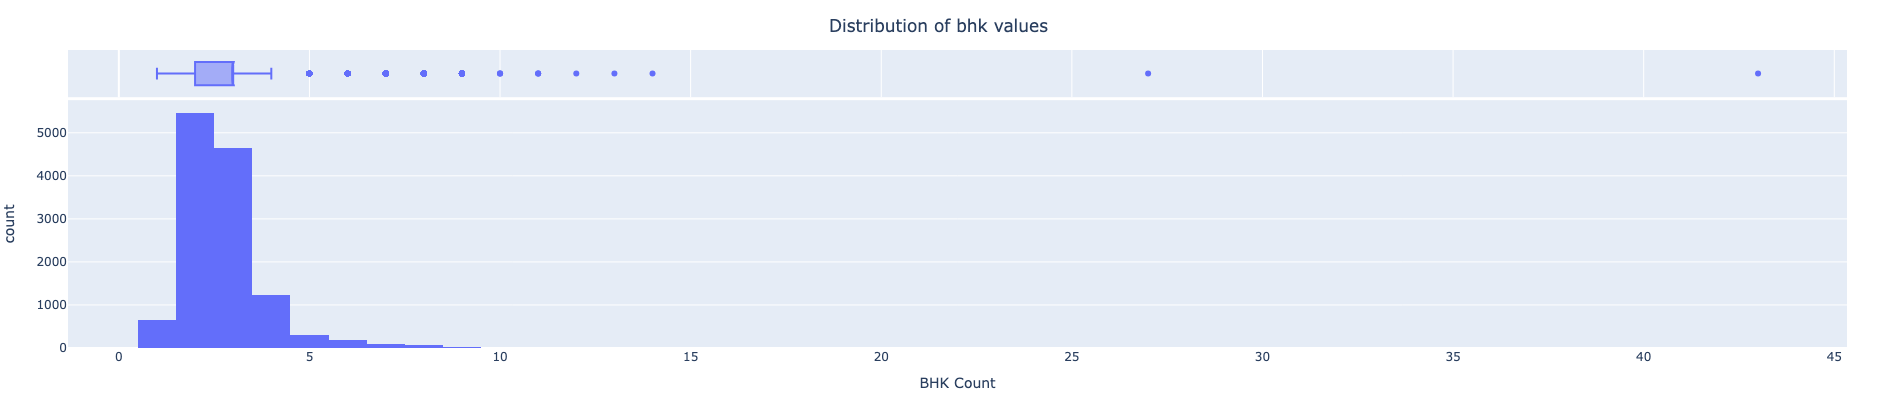

In [19]:
fig_bhk = px.histogram(df6, x='bhk', nbins=80, width=650, height=400, marginal = 'box',
                   labels={'bhk': 'BHK Count', 'count': 'Frequency'})

# Update layout for better appearance
fig_bhk.update_layout(
    title={'text': 'Distribution of bhk values', 'x': 0.5, 'y': 0.95},
    margin=dict(l=30, r=30, t=50, b=50),
)
fig_bhk

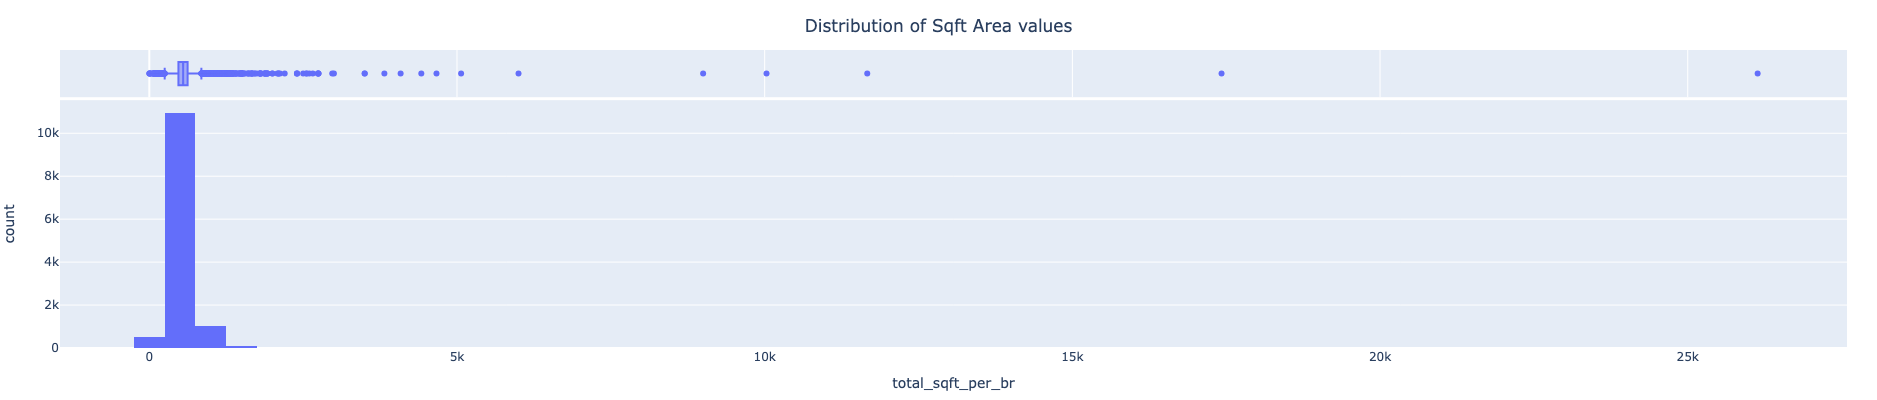

In [20]:
fig_area = px.histogram(df6, x='total_sqft_per_br', nbins=100, width=600, height=400, marginal = 'box',
                   labels={'total_sqft_category': 'Sqft Area per Bedroom', 'count': 'Frequency'})

# Update layout for better appearance
fig_area.update_layout(
    title={'text': 'Distribution of Sqft Area values', 'x': 0.5, 'y': 0.95},
    margin=dict(l=50, r=30, t=50, b=50),  # Adjust margins as needed
)
fig_area

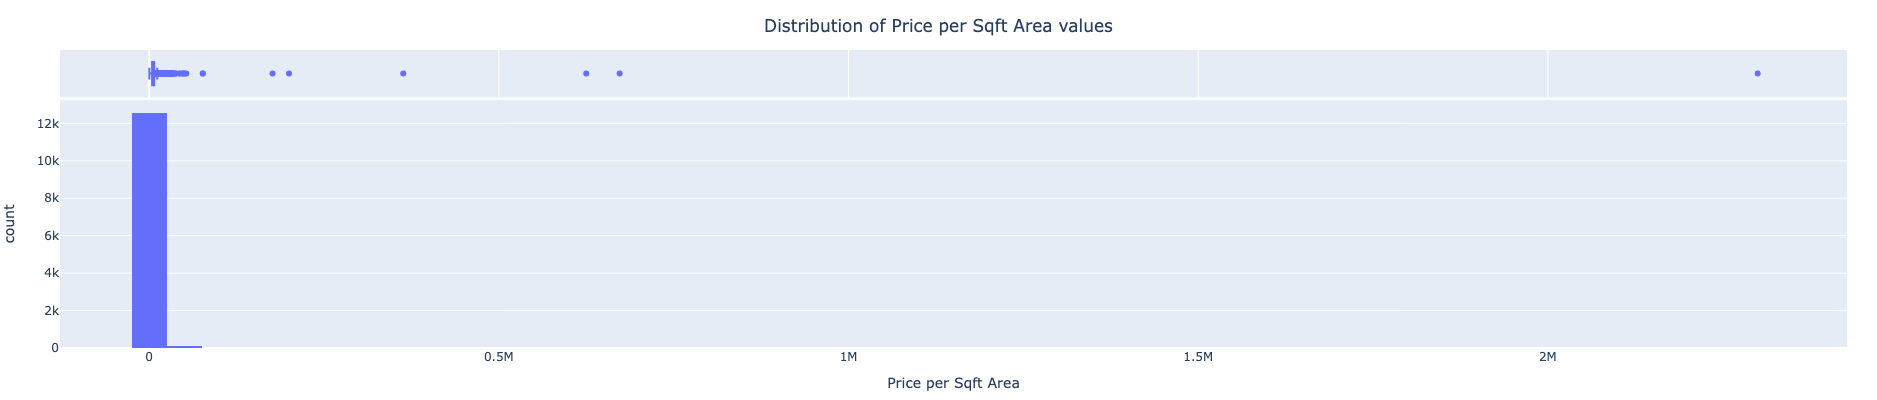

In [21]:
fig_price = px.histogram(df6, x='price_per_sqft', nbins=100, width=600, height=400, marginal = 'box',
                   labels={'price_per_sqft': 'Price per Sqft Area', 'count': 'Frequency'})

# Update layout for better appearance
fig_price.update_layout(
    title={'text': 'Distribution of Price per Sqft Area values', 'x': 0.5, 'y': 0.95},
    margin=dict(l=30, r=30, t=50, b=50),  # Adjust margins as needed
)
fig_price

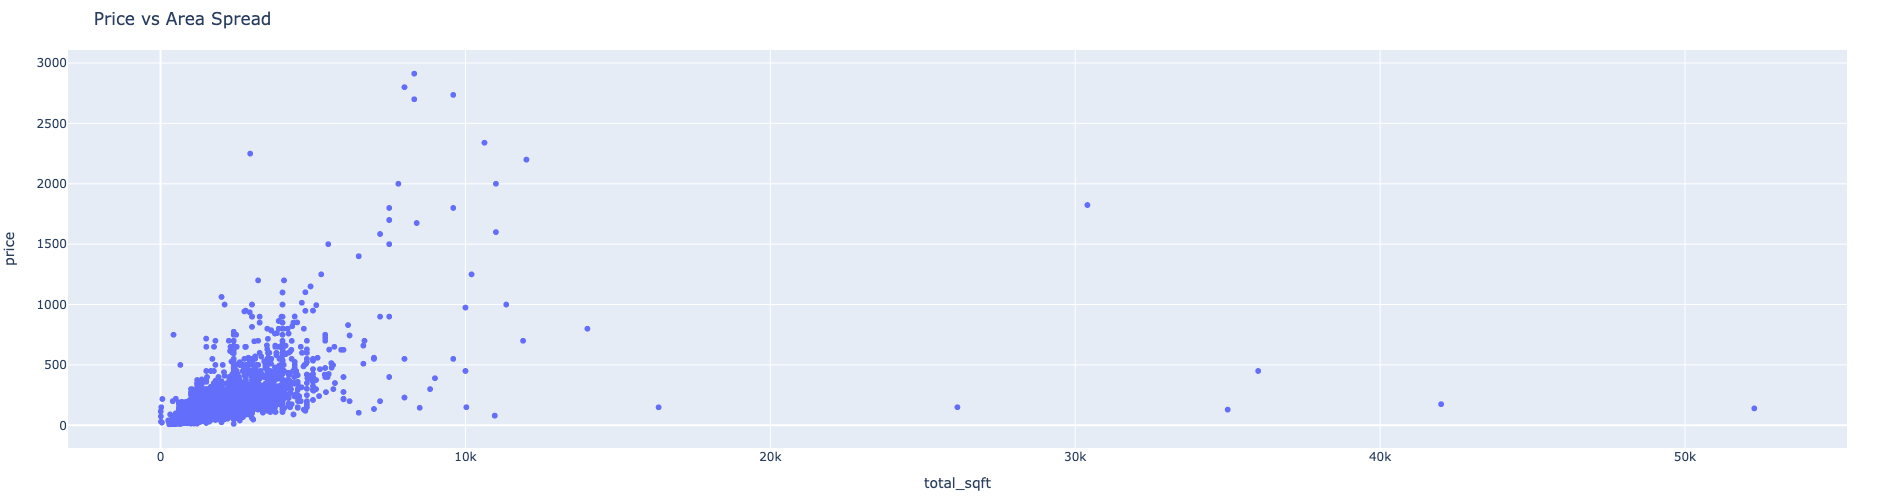

In [22]:
price_v_area = px.scatter(df6,x='total_sqft', y='price',width=600, height=500, title = 'Price vs Area Spread')
price_v_area.update_layout(
    margin=dict(l=50, r=30, t=50, b=50)
)


In [23]:
df6 = df6[(df6['delta_bath_bedroom'] > -2) & (df6['delta_bath_bedroom'] < 1)]

In [24]:
z_scores_total_sqft_per_br = np.abs((df6['total_sqft_per_br'] - df6['total_sqft_per_br'].mean()) / df6['total_sqft_per_br'].std())

In [25]:
df7 = df6[z_scores_total_sqft_per_br < .75]

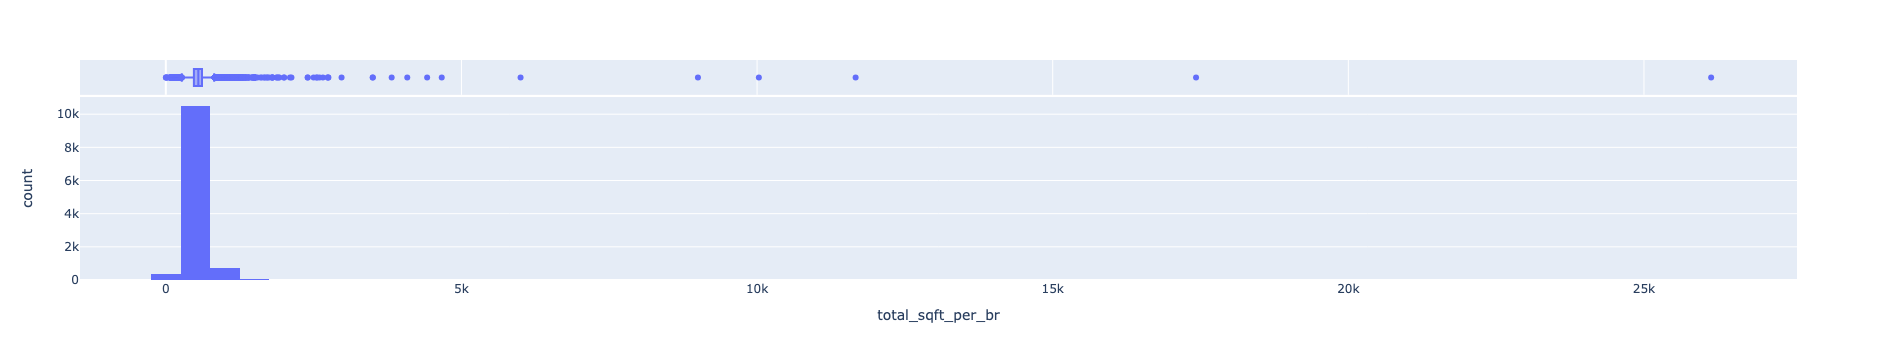

In [26]:
px.histogram(df6, x= 'total_sqft_per_br', nbins = 100, marginal = 'box')

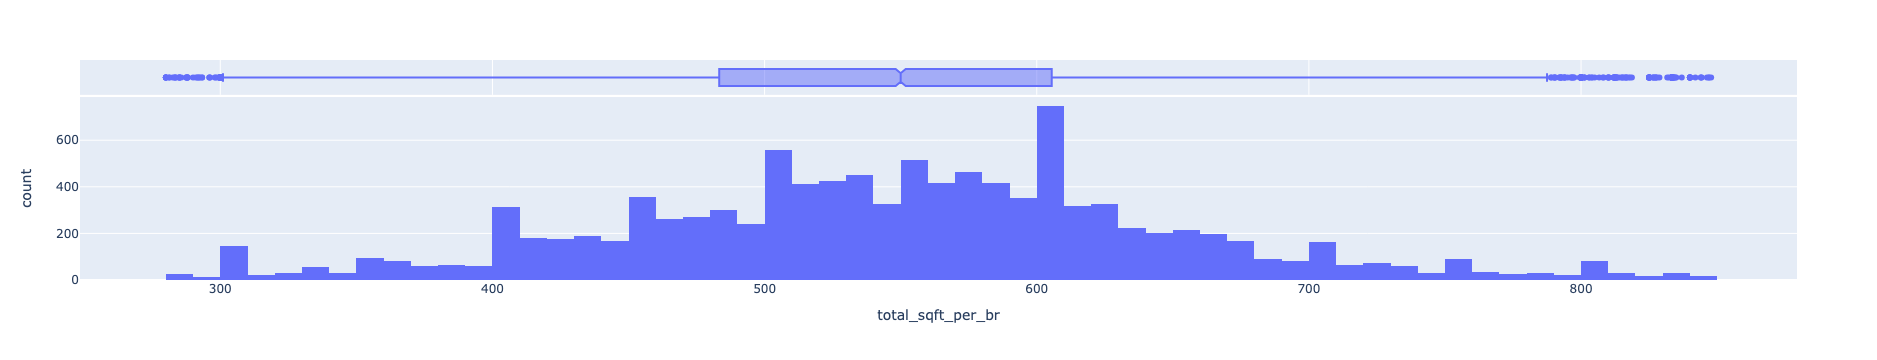

In [27]:
px.histogram(df7, x= 'total_sqft_per_br', nbins = 100, marginal = 'box')

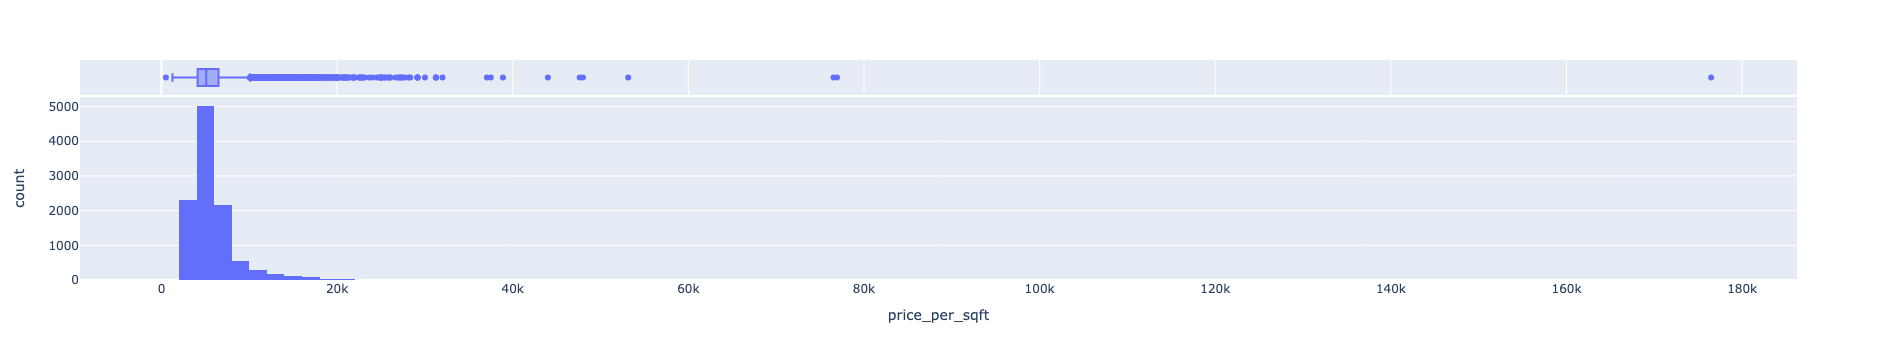

In [28]:
px.histogram(df7, x= 'price_per_sqft', nbins = 100, marginal = 'box')

In [29]:
z_scores_total_sqft_per_br = np.abs((df7['price_per_sqft'] - df7['price_per_sqft'].mean()) / df7['price_per_sqft'].std())
df8 = df7[z_scores_total_sqft_per_br < 1.2]

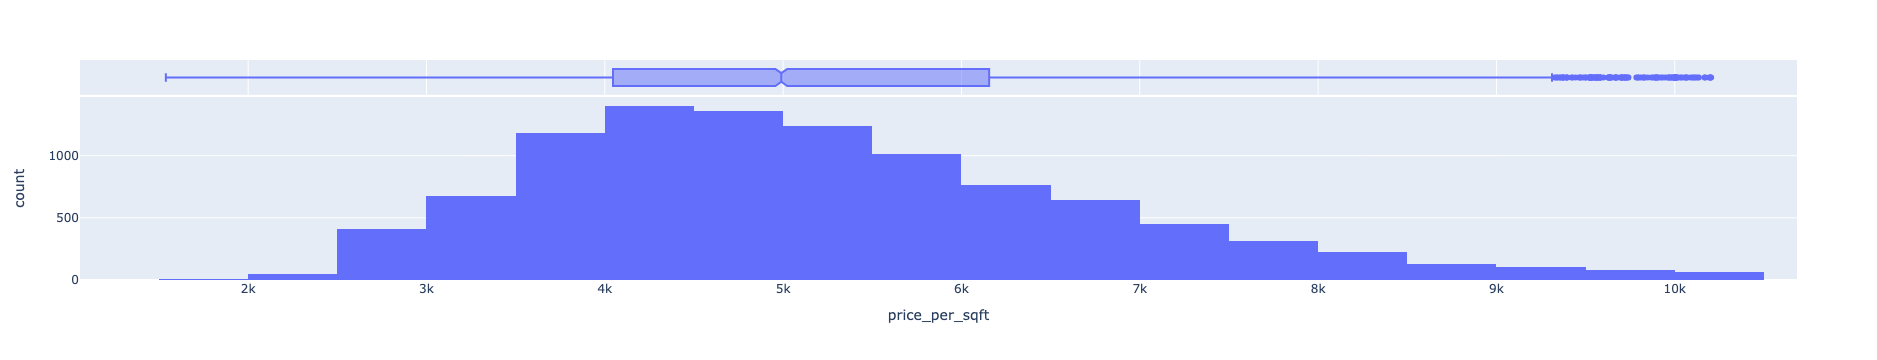

In [30]:
px.histogram(df8, x= 'price_per_sqft', nbins = 20, marginal = 'box')

In [31]:
df8['location'].value_counts()

Whitefield              411
Sarjapur  Road          305
Electronic City         287
Kanakpura Road          250
Thanisandra             206
                       ... 
Mailasandra               1
NS Palya                  1
kanakapura main road      1
3rd Phase JP Nagar        1
Sarvobhogam Nagar         1
Name: location, Length: 1013, dtype: int64

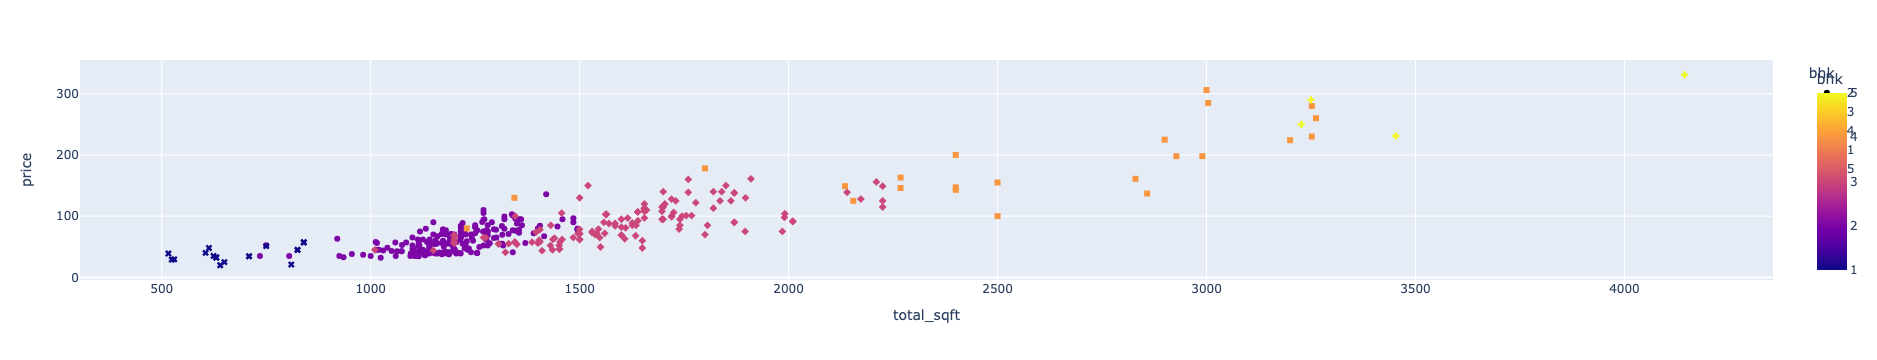

In [32]:
px.scatter(df8[df8['location']=='Whitefield'], x='total_sqft', y='price', color= 'bhk', symbol= 'bhk')

In [33]:
df8 = df8[df8['bhk'] < 6]

In [34]:
df9= df8.drop(['size', 'total_sqft_category', 'delta_bath_bedroom'], axis = 1)

In [35]:
location = df9.groupby('location').size().sort_values(ascending = False).reset_index(name='count')
others = location[location['count'] <= 9]['location']
others

203                 Tindlu
204          Iblur Village
205                 Ulsoor
206     Basaveshwara Nagar
207             Gollahalli
               ...        
999            Jayanagar, 
1000             Jayamahal
1001          Javarandoddi
1002    Jaladarsini Layout
1003            whitefiled
Name: location, Length: 801, dtype: object

In [36]:
df9.loc[df9['location'].isin(others), 'location'] = 'other'

In [37]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'median': np.median(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['median'])].index.values)
    return df.drop(exclude_indices,axis='index')
df10 = remove_bhk_outliers(df9)


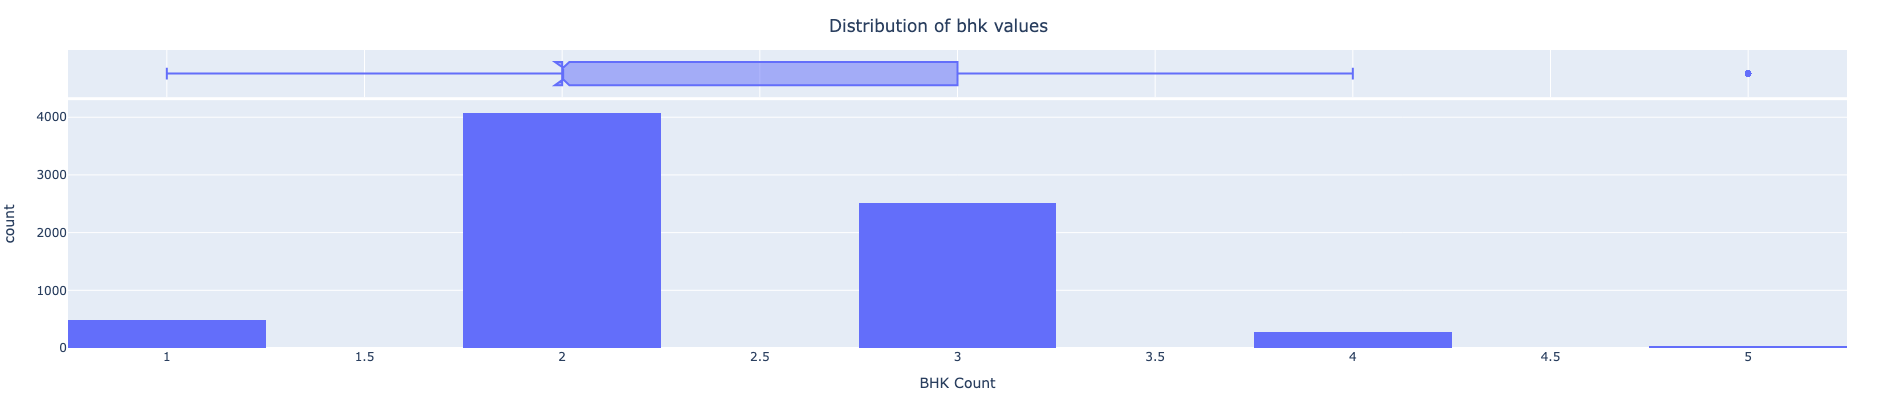

In [38]:
fig_bhk1 = px.histogram(df10, x='bhk', nbins=9, width=400, height=400, marginal = 'box',
                   labels={'bhk': 'BHK Count', 'count': 'Frequency'})

# Update layout for better appearance
fig_bhk1.update_layout(
    title={'text': 'Distribution of bhk values', 'x': 0.5, 'y': 0.95},
    margin=dict(l=50, r=30, t=50, b=50), 
)
fig_bhk1

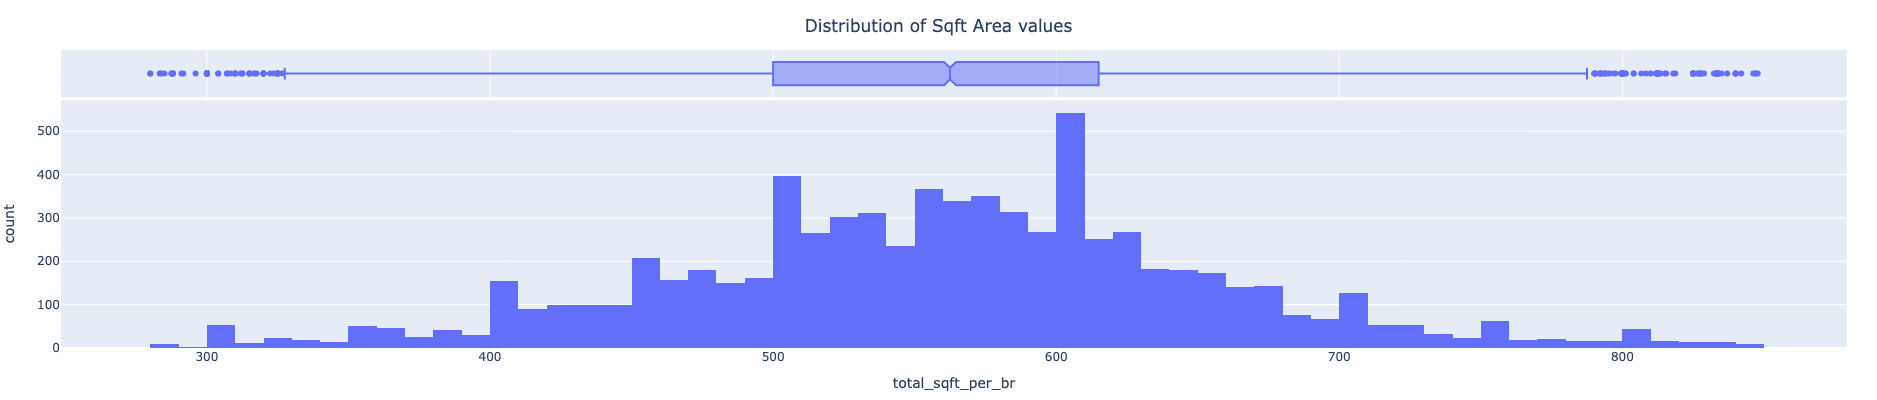

In [39]:
fig_area1 = px.histogram(df10, x='total_sqft_per_br', nbins=100, width=400, height=400, marginal = 'box',
                   labels={'total_sqft_category': 'Sqft Area per Bedroom', 'count': 'Frequency'})

# Update layout for better appearance
fig_area1.update_layout(
    title={'text': 'Distribution of Sqft Area values', 'x': 0.5, 'y': 0.95},
    margin=dict(l=30, r=30, t=50, b=50),  # Adjust margins as needed
)
fig_area1

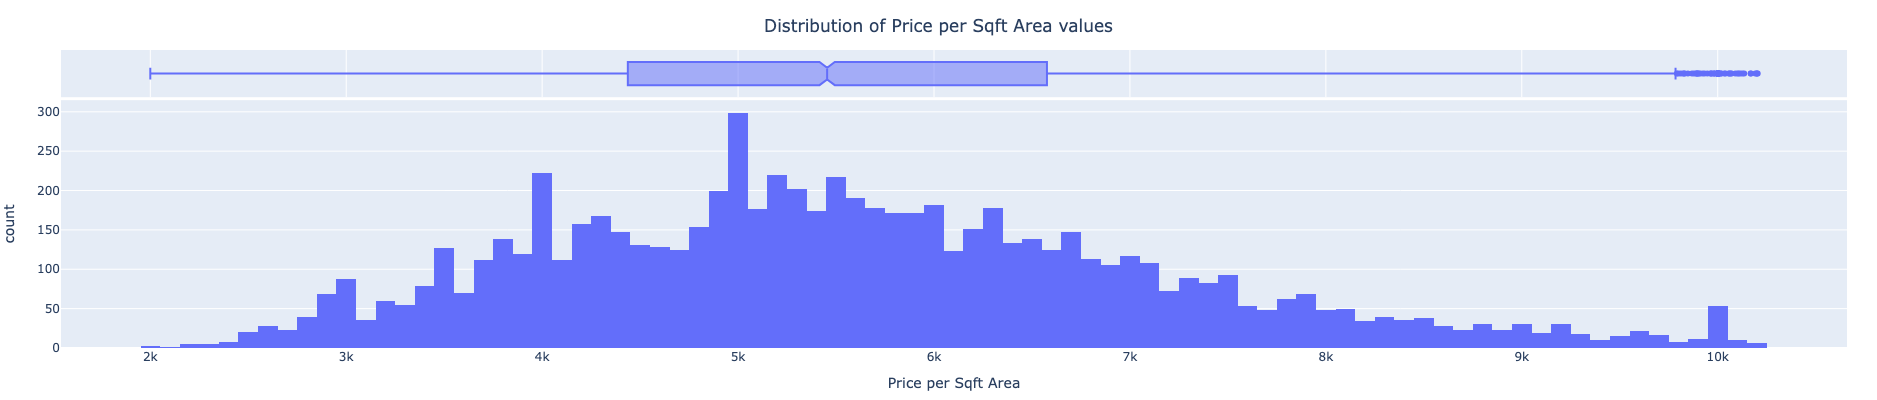

In [40]:
fig_price1 = px.histogram(df10, x='price_per_sqft', nbins=100, width=400, height=400, marginal = 'box',
                   labels={'price_per_sqft': 'Price per Sqft Area', 'count': 'Frequency'})

# Update layout for better appearance
fig_price1.update_layout(
    title={'text': 'Distribution of Price per Sqft Area values', 'x': 0.5, 'y': 0.95},
    margin=dict(l=50, r=30, t=50, b=50),  # Adjust margins as needed
)
fig_price1

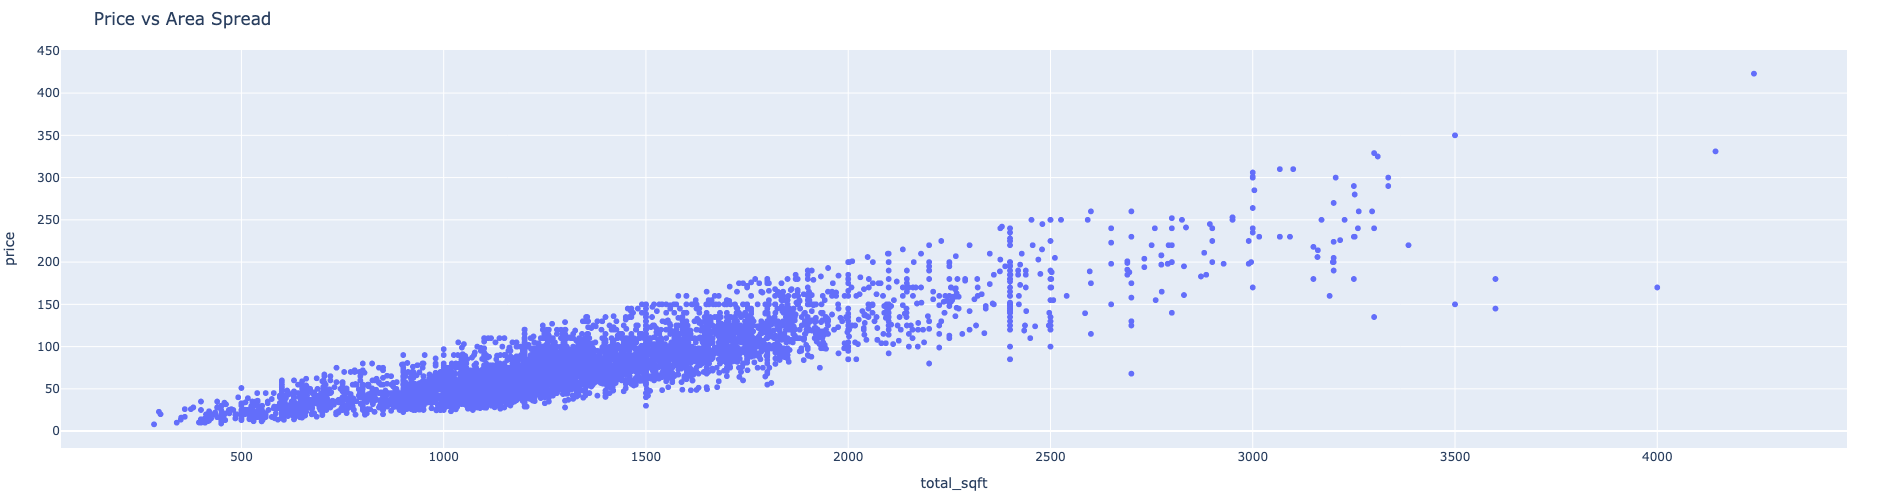

In [41]:
price_v_area1 = px.scatter(df10,x='total_sqft', y='price',width=600, height=500, title = 'Price vs Area Spread')
price_v_area1.update_layout(
    margin=dict(l=50, r=30, t=50, b=50)
)

In [42]:
df10['location'].value_counts()

other                    1182
Whitefield                204
Sarjapur  Road            189
Uttarahalli               137
Raja Rajeshwari Nagar     136
                         ... 
Mico Layout                 8
Kadubeesanahalli            8
Gunjur Palya                8
Basapura                    7
Narayanapura                7
Name: location, Length: 204, dtype: int64

In [43]:
df11 = df10.drop(['total_sqft_per_br', 'price_per_sqft'], axis = 1)

In [44]:
df11.reset_index(drop=True, inplace = True)

In [46]:
location_encoder = OneHotEncoder(handle_unknown='ignore', categories='auto', drop='first')
encoded_data = location_encoder.fit_transform(df11[['location']])
feature_names = location_encoder.get_feature_names_out(['location'])

In [47]:
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)
encoded_df

location_1st Phase JP Nagar  location_2nd Phase Judicial Layout  \
0                             0.0                                 0.0   
1                             0.0                                 0.0   
2                             0.0                                 0.0   
3                             0.0                                 0.0   
4                             0.0                                 0.0   
...                           ...                                 ...   
7410                          0.0                                 0.0   
7411                          0.0                                 0.0   
7412                          0.0                                 0.0   
7413                          0.0                                 0.0   
7414                          0.0                                 0.0   

      location_5th Phase JP Nagar  location_6th Phase JP Nagar  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             0.0                          0.0   
...                           ...                          ...   
7410                          0.0                          0.0   
7411                          0.0                          0.0   
7412                          0.0                          0.0   
7413                          0.0                          0.0   
7414                          0.0                          0.0   

      location_7th Phase JP Nagar  location_8th Phase JP Nagar  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             1.0                          0.0   
...                           ...                          ...   
7410                          0.0                          0.0   
7411                          0.0                          0.0   
7412                          0.0                          0.0   
7413                          0.0                          0.0   
7414                          0.0                          0.0   

      location_9th Phase JP Nagar  location_AECS Layout  location_Abbigere  \
0                             0.0                   0.0                0.0   
1                             0.0                   0.0                0.0   
2                             0.0                   0.0                0.0   
3                             0.0                   0.0                0.0   
4                             0.0                   0.0                0.0   
...                           ...                   ...                ...   
7410                          0.0                   0.0                0.0   
7411                          0.0                   0.0                0.0   
7412                          0.0                   0.0                0.0   
7413                          0.0                   0.0                0.0   
7414                          0.0                   0.0                0.0   

      location_Akshaya Nagar  ...  location_Vidyaranyapura  \
0                        0.0  ...                      0.0   
1                        0.0  ...                      0.0   
2                        0.0  ...                      0.0   
3                        0.0  ...                      0.0   
4                        0.0  ...                      0.0   
...                      ...  ...                      ...   
7410                     0.0  ...                      0.0   
7411                     0.0  ...                      0.0   
7412                     0.0  ...               

In [48]:
df12 = pd.concat([df11.drop(['location'], axis=1),encoded_df],axis=1)

In [49]:
location = df11['location'].unique().tolist()

In [50]:
location_df = pd.DataFrame(location, columns=['location'])
location_df.to_csv('/Users/gaurav/PycharmProjects/House_Price_Prediction/location.csv', index=False)

In [51]:
X = df12.drop(['price'],axis=1)
y = df12['price']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 200)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8171131953085234

In [54]:
y_pred = model.predict(X_test)

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Mean Absolute Error (MAE): 11.37
Mean Squared Error (MSE): 317.16
Root Mean Squared Error (RMSE): 17.81
R-squared (R2) Score: 0.82


/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [57]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 100)

cross_val_score(RandomForestRegressor(n_estimators=200), X, y, cv=cv)

array([0.81488634, 0.81679712, 0.82465115, 0.80379303, 0.82581291])

In [58]:
random_input = [['Magadi Road']]
encoded_input = location_encoder.transform(random_input)
print(encoded_input)

  (0, 135)	1.0


/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



In [59]:
encoded_location = location_encoder.transform([['Mysore Road']])

input_data = pd.DataFrame({
    'total_sqft': [1500],
    'bath': [3],
    'balcony': [2],
    'bhk': [3],
    'location_encoded': [encoded_location]
}, columns=['total_sqft', 'bath', 'balcony', 'bhk'] + list(feature_names))

/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



In [60]:
predicted_price = model.predict(input_data)[0]

In [61]:
predicted_price

88.66476841269844

In [62]:
with open('location_encoder.pkl', 'wb') as file:
    pickle.dump(location_encoder, file)

In [63]:
from joblib import dump

dump(model, 'random_forest_model.joblib', compress=('zlib', 2))

['random_forest_model.joblib']

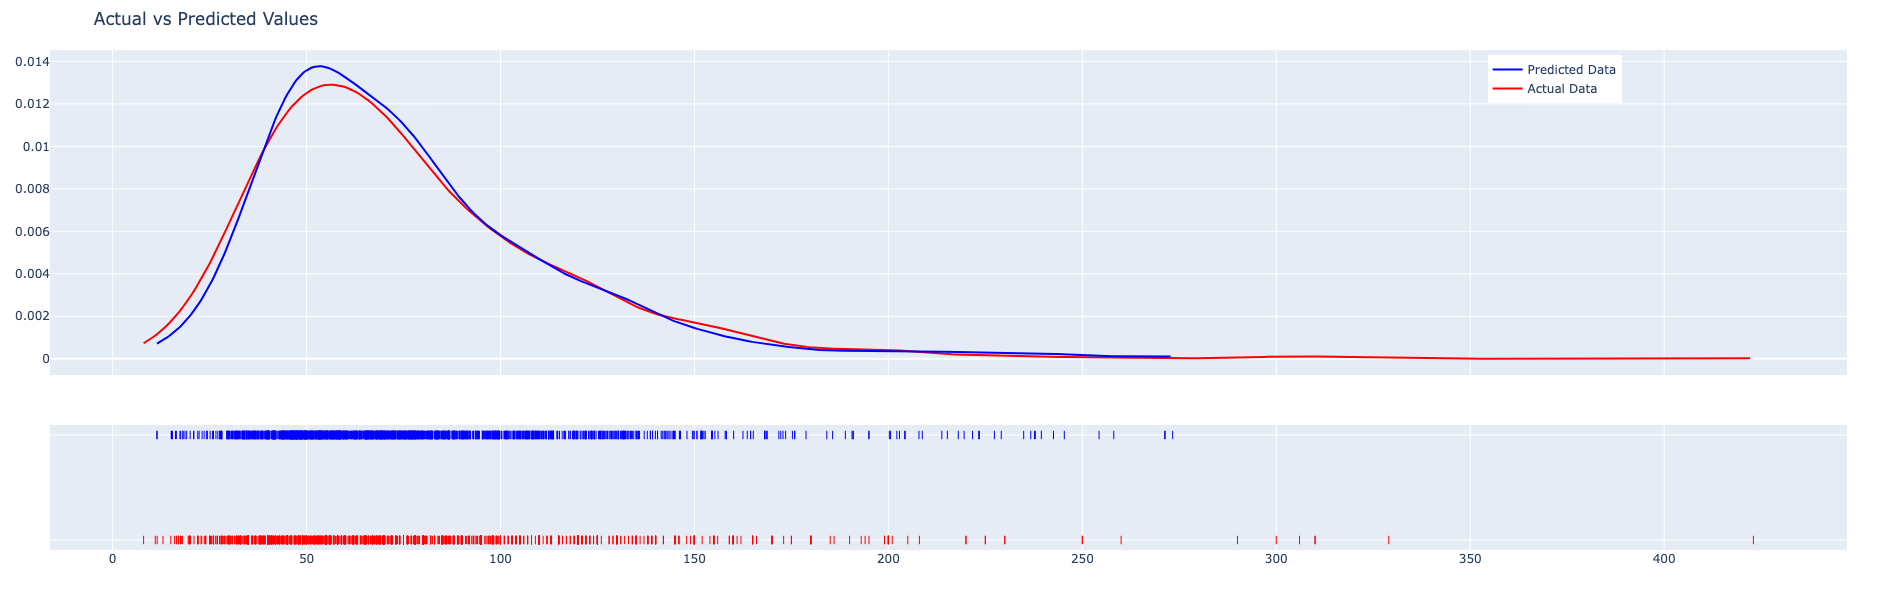

In [65]:
import plotly.figure_factory as ff

hist_data = [y_test, y_pred]
group_labels = ['Actual Data', 'Predicted Data']
colors = ['red', 'blue']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors, show_rug=True)
fig.update_layout(height=600, margin=dict(l=50, r=30, t=50, b=50), title_text='Actual vs Predicted Values', legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.8))

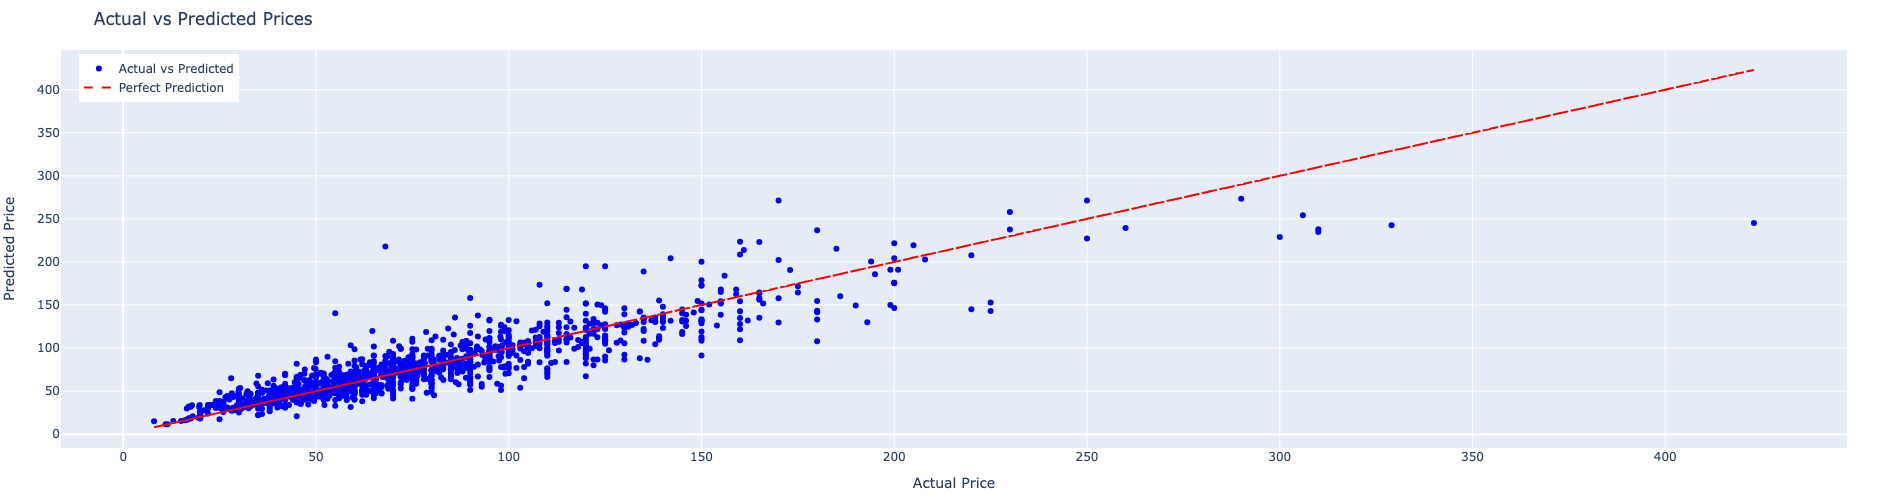

In [67]:
import plotly.graph_objects as go

# Assuming you have actual_data (y_test) and predicted_data (y_pred)
actual_data = y_test
predicted_data = y_pred

# Create a scatter plot of actual vs predicted values
fig = go.Figure()

# Add a scatter plot for actual vs predicted values
fig.add_trace(go.Scatter(x=actual_data, y=predicted_data, mode='markers', name='Actual vs Predicted', marker=dict(color='blue')))

# Add a line representing perfect prediction (y = x)
fig.add_trace(go.Scatter(x=actual_data, y=actual_data, mode='lines', name='Perfect Prediction', line=dict(color='red', dash='dash')))

# Update layout
fig.update_layout(title='Actual vs Predicted Prices',
                  xaxis_title='Actual Price',
                  yaxis_title='Predicted Price',
                  legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.01),
                 height = 500, margin=dict(l=50, r=30, t=50, b=50))
# Show the plot
fig.show()